In [109]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



In [110]:
from PIL import Image
from sklearn.model_selection import train_test_split

In [111]:
person_image = os.listdir('random_person')

In [112]:
print(len(person_image))

3828


In [113]:
# create the labels
saurab_image = os.listdir('saurab_image')

In [114]:
saurab_image[0:5]

['photo_10_2023-06-11_16-08-35.jpg',
 'photo_10_2023-06-11_16-09-22.jpg',
 'photo_10_2023-06-11_16-09-28.jpg',
 'photo_10_2023-06-11_16-09-34.jpg',
 'photo_10_2023-06-11_16-09-40.jpg']

In [115]:
# create the labels
person_labels = np.zeros(len(person_image))
saurab_labels = np.ones(len(saurab_image))
len(saurab_image), person_labels

(190, array([0., 0., 0., ..., 0., 0., 0.]))

In [116]:
labels = np.concatenate((person_labels, saurab_labels))
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [117]:
import cv2

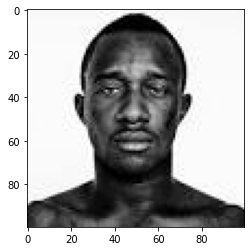

In [118]:
img = cv2.imread('random_person/without_mask_1.jpg')
plt.imshow(img)



# Image Processing
1 Resize the image 

2 Convert the image to numpy array


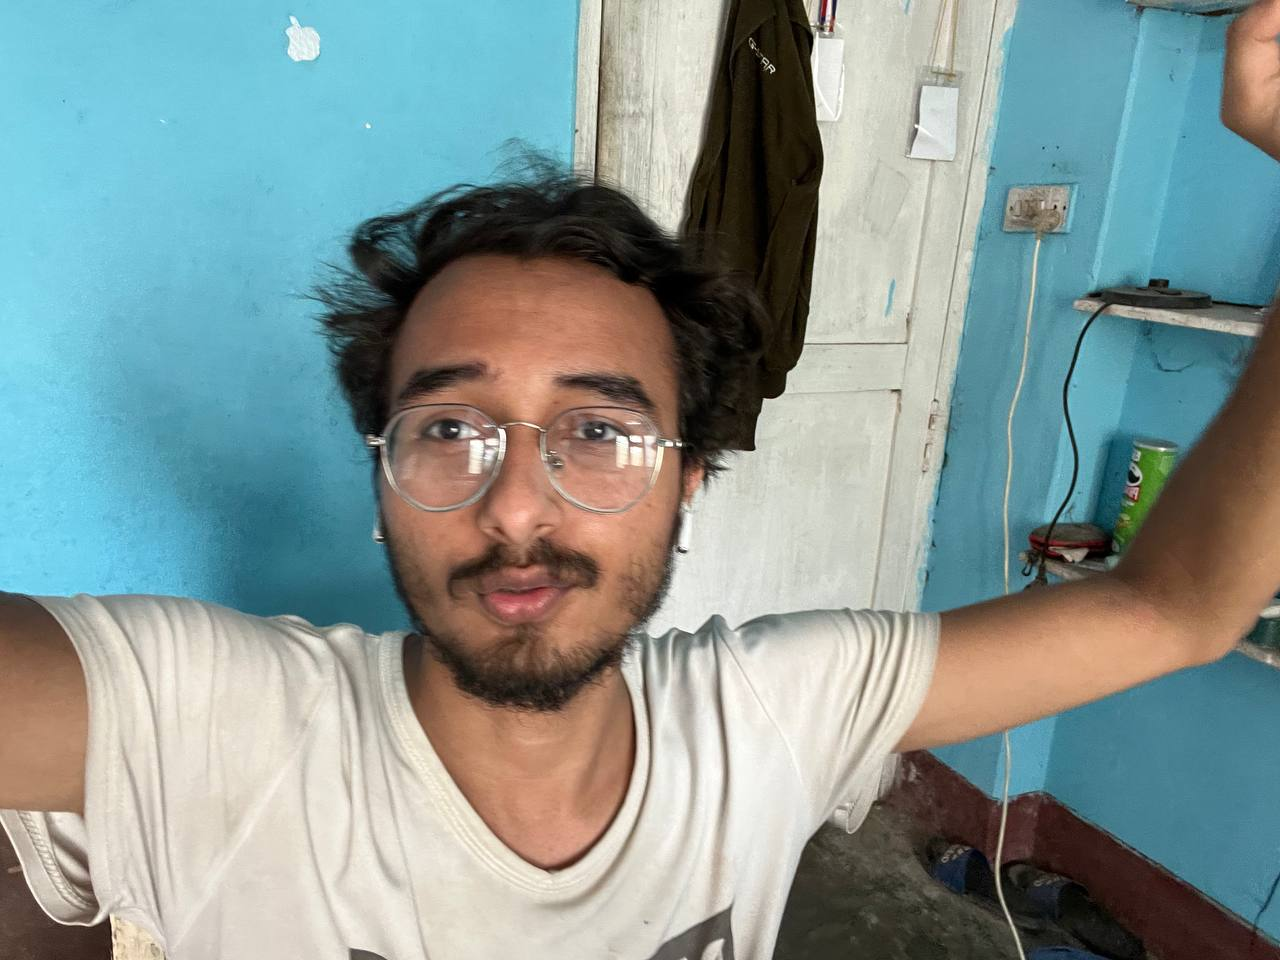

In [119]:
Image.open(f'saurab_image/{saurab_image[0]}')


In [120]:
# data = []
# for i in person_image:
#     try:
#         image = cv2.imread(f'random_person/{i}')
#         # image above will convert the image into an array
#         # and image from array will convet the array into an image
#         image_from_array = Image.fromarray(image, 'RGB')
#         size_image = image_from_array.resize((50, 50))
#         data.append(np.array(size_image))
#     except AttributeError:
#         print('')

# cv2 is way faster than PIL

data = []
for i in person_image:
    try:
        img_path = f'random_person/{i}'

        # Read the image using cv2
        img = cv2.imread(img_path)

        # Resize the image to (50, 50)
        img = cv2.resize(img, (50, 50))

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Append the image to the data list
        data.append(img)
    except AttributeError:
        print('')


In [121]:
for i in saurab_image:
    try:
        img_path = f'saurab_image/{i}'

        # Read the image using cv2
        img = cv2.imread(img_path)

        # Resize the image to (50, 50)
        img = cv2.resize(img, (50, 50))

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Append the image to the data list
        data.append(img)
    except AttributeError:
        print('')

In [122]:
len(data), len(labels)

(4018, 4018)

In [123]:
type(data), data[0].shape

(list, (50, 50, 3))

# Converting the images list to numpy images

In [124]:
array_data = np.array(data)

In [125]:
array_data.shape

(4018, 50, 50, 3)

In [126]:
array_data[0]

array([[[248, 248, 248],
        [248, 248, 248],
        [248, 248, 248],
        ...,
        [248, 248, 248],
        [246, 246, 246],
        [246, 246, 246]],

       [[249, 249, 249],
        [249, 249, 249],
        [249, 249, 249],
        ...,
        [248, 248, 248],
        [247, 247, 247],
        [247, 247, 247]],

       [[250, 250, 250],
        [250, 250, 250],
        [250, 250, 250],
        ...,
        [248, 248, 248],
        [248, 248, 248],
        [248, 248, 248]],

       ...,

       [[ 39,  39,  39],
        [ 62,  62,  62],
        [ 82,  82,  82],
        ...,
        [ 52,  52,  52],
        [ 36,  36,  36],
        [ 29,  29,  29]],

       [[ 35,  35,  35],
        [ 51,  51,  51],
        [ 90,  90,  90],
        ...,
        [ 43,  43,  43],
        [ 39,  39,  39],
        [ 26,  26,  26]],

       [[ 41,  41,  41],
        [ 52,  52,  52],
        [ 82,  82,  82],
        ...,
        [ 42,  42,  42],
        [ 39,  39,  39],
        [ 27,  27,  27]]

In [127]:
array_data = array_data/255

In [128]:
type(array_data), type(labels), 

(numpy.ndarray, numpy.ndarray)

In [129]:
# import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(array_data, labels, test_size=0.2, random_state=42)

In [130]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((3214, 50, 50, 3), (804, 50, 50, 3), (3214,), (804,))

# Building t he convolution Neural Network(CNN)


In [131]:
# import keras
import tensorflow as tf
from tensorflow import keras

In [132]:
x_train.shape[1:]

(50, 50, 3)

In [133]:
# one for knowing saurab and other for knowing person
num_of_class = 2
model = keras.Sequential()
# Adding the first CNN layer
# input_shape = (50, 50, 3) because we have resized the image into 50, 50 and 3 is for RGB
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=x_train.shape[1:]))
# Adding the second layer with maxpooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))


# Adding the third layer
model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# Adding the fourth layer with maxpooling
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

# Adding the flatten layer
model.add(keras.layers.Flatten())
# Adding the first dense layer
# units = 128 is the number of neurons
model.add(keras.layers.Dense(units=128, activation='relu'))

# Dropout layer (used to avoid overfitting)
model.add(keras.layers.Dropout(rate=0.5))

model.add(keras.layers.Dense(units=64, activation='relu'))
model.add(keras.layers.Dropout(rate=0.5))

# Add the second dense layer (output layer)
model.add(keras.layers.Dense(units=num_of_class, activation='sigmoid'))


In [134]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 11, 11, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# Training the CNN

In [135]:
# compile the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [136]:
history = model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

Epoch 1/7
101/101 [==============================] - 10s 85ms/step - loss: 0.1912 - accuracy: 0.9505 - val_loss: 0.1130 - val_accuracy: 0.9490
Epoch 2/7
101/101 [==============================] - 9s 94ms/step - loss: 0.0755 - accuracy: 0.9627 - val_loss: 0.0486 - val_accuracy: 0.9863
Epoch 3/7
101/101 [==============================] - 7s 73ms/step - loss: 0.0439 - accuracy: 0.9810 - val_loss: 0.0389 - val_accuracy: 0.9925
Epoch 4/7
101/101 [==============================] - 7s 73ms/step - loss: 0.0416 - accuracy: 0.9851 - val_loss: 0.0558 - val_accuracy: 0.9863
Epoch 5/7
101/101 [==============================] - 7s 72ms/step - loss: 0.0262 - accuracy: 0.9910 - val_loss: 0.0291 - val_accuracy: 0.9950
Epoch 6/7
101/101 [==============================] - 8s 78ms/step - loss: 0.0153 - accuracy: 0.9956 - val_loss: 0.0543 - val_accuracy: 0.9900
Epoch 7/7
101/101 [==============================] - 7s 73ms/step - loss: 0.0085 - accuracy: 0.9984 - val_loss: 0.0420 - val_accuracy: 0.9950


In [137]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape  

((3214, 50, 50, 3), (3214,), (804, 50, 50, 3), (804,))

# Model Evaluation and Prediction

In [138]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)

26/26 [==============================] - 0s 15ms/step - loss: 0.0420 - accuracy: 0.9950


In [139]:
y_pred = model.predict(x_test)

26/26 [==============================] - 1s 16ms/step


In [140]:
y_pred = np.argmax(y_pred, axis=1)

In [141]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [142]:
y_test[:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [143]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

In [144]:
cm, acc

(array([[763,   0],
        [  4,  37]], dtype=int64),
 0.9950248756218906)

In [145]:
x_test.shape

(804, 50, 50, 3)

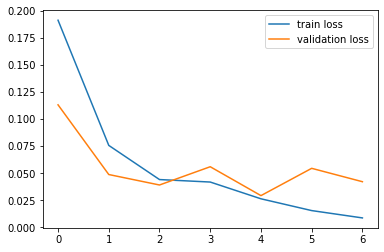

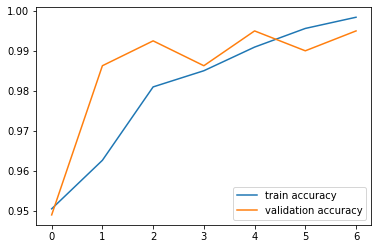

In [146]:
# plot the loss value
h = history
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy values
plt.plot(h.history['accuracy'], label='train accuracy')
plt.plot(h.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

### Predict system

In [147]:
image_folder = os.listdir('check_saurab')
image_folder

['photo_1_2023-06-11_17-28-15.jpg',
 'photo_2_2023-06-11_17-28-15.jpg',
 'photo_3_2023-06-11_17-28-15.jpg',
 'Screenshot 2023-06-11 170022.png',
 'WIN_20220910_22_28_54_Pro.jpg',
 'WIN_20230613_15_16_38_Pro.jpg',
 'WIN_20230613_15_32_17_Pro.jpg']

In [148]:
for i in image_folder:
    # print(i)

# Read the image using cv2
    input_image = cv2.imread(f'check_saurab/{i}')

    # Resize the image to (50, 50)
    input_image = cv2.resize(input_image, (50, 50))

    # Convert the image to RGB format
    input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

    # Convert the image to numpy array
    # here input_image is in format of (50, 50, 3) but model takes (1,50,50,3)
    # where 1 is the number of image
    input_image = np.asarray(input_image)
    
    input_image = np.expand_dims(input_image, axis=0)

    x = model.predict(input_image)
    print(f"This is x: {x}")
    y = np.argmax(x, axis=1)
    if y == 0:
        print('Random Person')
    else:
        print('Saurab')
    


1/1 [==============================] - 0s 93ms/step
This is x: [[0. 1.]]
Saurab
1/1 [==============================] - 0s 22ms/step
This is x: [[0. 1.]]
Saurab
1/1 [==============================] - 0s 24ms/step
This is x: [[0. 1.]]
Saurab
1/1 [==============================] - 0s 24ms/step
This is x: [[1. 0.]]
Random Person
1/1 [==============================] - 0s 22ms/step
This is x: [[0. 1.]]
Saurab
1/1 [==============================] - 0s 21ms/step
This is x: [[1. 0.]]
Random Person
1/1 [==============================] - 0s 25ms/step
This is x: [[1.976294e-18 1.000000e+00]]
Saurab


In [149]:
model

In [156]:
import cv2
import numpy as np

# Load your pre-trained CNN model

# Define the desired dimensions
desired_width = 50
desired_height = 50

# Initialize the webcam
video_capture = cv2.VideoCapture(0)  # 0 represents the default webcam device

while True:
    # Capture frame-by-frame from the webcam
    ret, frame = video_capture.read()

    # Flip the frame horizontally
    frame = cv2.flip(frame, 1)

    # Resize the frame to match the desired dimensions
    resized_frame = cv2.resize(frame, (desired_width, desired_height))

    # Convert the image to RGB format
    resized_frame = cv2.cvtColor(resized_frame, cv2.COLOR_BGR2RGB)

    # Convert the image to numpy array
    resized_frame = np.asarray(resized_frame)

    # Expand dimensions to match the input shape of your CNN model
    resized_frame = np.expand_dims(resized_frame, axis=0)

    # Normalize pixel values
    resized_frame = resized_frame / 255.0

    # Pass the preprocessed frame through your CNN model for person detection
    predictions = model.predict(resized_frame)
    print(f"This is x: {predictions}")
    y = np.argmax(predictions, axis=1)
    if y == 0:
        print('Random Person')
    else:
        print('Saurab')

    # Display the frame with overlays or visual indicators of person detection
    cv2.imshow('Person Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the windows
video_capture.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 24ms/step
This is x: [[0.23601586 0.98291993]]
Saurab
1/1 [==============================] - 0s 52ms/step
This is x: [[0.2712089  0.96881396]]
Saurab
1/1 [==============================] - 0s 44ms/step
This is x: [[0.28536776 0.9614973 ]]
Saurab
1/1 [==============================] - 0s 36ms/step
This is x: [[0.99918437 0.00206555]]
Random Person
1/1 [==============================] - 0s 36ms/step
This is x: [[0.9992598  0.00188897]]
Random Person
1/1 [==============================] - 0s 32ms/step
This is x: [[0.9985075  0.00354983]]
Random Person
1/1 [==============================] - 0s 32ms/step
This is x: [[0.9983115  0.00400742]]
Random Person
1/1 [==============================] - 0s 32ms/step
This is x: [[0.99744344 0.0057883 ]]
Random Person
1/1 [==============================] - 0s 27ms/step
This is x: [[0.9971154  0.00641405]]
Random Person
1/1 [==============================] - 0s 31ms/step
This is x: [[0.9969663  0.00667481]]
Rando